In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import torch
import torch.nn as nn

In [50]:
def Dispersion(data):
  mean = data.mean()
  D = 0
  for i in data:
    D += (i - mean)**2
  D = D/(len(data)-1)
  return D
def standartdeviation(data):
  return sqrt(Dispersion(data))
def range1(data):
  return data.max() - data.min()
def cv(data):
  return standartdeviation(data)/data.mean()
def standarterror(data):
  return standartdeviation(data)/data.shape[0]
def countall(data):
  di = {'data': [Dispersion(data), standartdeviation(data), data.mean(), data.median(), cv(data), range1(data)],
        'name': ['dispersion', 'standart deviation', 'mean', 'median', 'cv', 'range']}
  df = pd.DataFrame(di)
  return df
def countall_dict(data):
  di = {'dispersion': Dispersion(data),
        'standart deviation': standartdeviation(data),
        'mean': data.mean(),
        'median': data.median(),
        'STD(cv)': cv(data),
        'range': range1(data),
        'sum': data.sum(),
        'max': data.max(),
        'min': data.min()}
  return di
def quantile(data):
  q1 = np.quantile(data, 0.25)
  q3 = np.quantile(data, 0.75)
  IQR = q3 - q1
  return IQR

In [124]:
df_train_X = pd.read_csv('PlaneChalData/train_X.csv')
df_train_y = pd.read_csv('PlaneChalData/train_y.csv')
df_test_X = pd.read_csv('PlaneChalData/test1_X.csv')

In [125]:
df = pd.merge(df_train_X, df_train_y, how='inner', on = ['contract_id', 'report_date'])

In [126]:
df.to_csv("Full_data.csv")

In [14]:
df.contract_date = pd.to_datetime(df['contract_date'])
df.report_date = pd.to_datetime(df['report_date'])

In [22]:
correl = df.corr().default6.to_frame().reset_index()

In [34]:
correl[(correl.default6 < 0.01) & (correl.default6 > -0.01)]

,index,default6
34,agg_cec_requests__g_contract__total_sum_accept...,0.004596
70,agg_ks2__g_contract__total_sum__all__sum__1W,0.009350
75,agg_ks2__g_contract__total_sum__all__sum__ALL_...,0.006240
77,counteragent_sum_agg_ks2__g_contract__total_su...,0.009831
112,agg_scontrol__g_contractor__close_delay__defec...,0.003994
114,agg_scontrol__g_contractor__close_delay__defec...,-0.005631
134,agg_spark_extended_report__g_contractor__Pledg...,-0.006020


In [46]:
df.corr()

,contract_id,report_date,specialization_id,contract_init_sum,contract_date,project_id,building_id,contractor_id,contract_current_sum,agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME,...,agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__ALL_TIME,agg_tender_proposal__g_contractor__id__ALL__countDistinct__1W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__2W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__4W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__8W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__52W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__ALL_TIME,default6
contract_id,1.000000,0.010415,-0.019060,-0.008698,0.018589,-0.005098,-0.002582,-0.037471,-0.026762,-0.019295,...,-0.026873,-0.025619,-0.026279,-0.027654,-0.026898,-0.022956,-0.016858,-0.015080,-0.015076,-0.027279
report_date,0.010415,1.000000,0.034118,-0.017895,0.626686,-0.021992,-0.077896,0.011750,-0.048896,-0.096630,...,0.017119,0.048345,0.065848,0.085689,0.109108,0.109046,0.111019,0.132471,0.132779,0.080015
specialization_id,-0.019060,0.034118,1.000000,-0.082337,0.015875,0.046458,-0.011156,0.099848,-0.103390,-0.058140,...,0.151376,-0.027203,-0.034494,-0.040227,-0.042046,-0.039515,-0.030040,-0.030388,-0.030271,-0.013060
contract_init_sum,-0.008698,-0.017895,-0.082337,1.000000,0.019767,0.036606,-0.094318,-0.010849,0.819877,0.001178,...,-0.065780,-0.034325,-0.039891,-0.042395,-0.043798,-0.046779,-0.060893,-0.065364,-0.065542,0.092912
contract_date,0.018589,0.626686,0.015875,0.019767,1.000000,0.022394,-0.077915,0.002186,-0.083002,-0.407229,...,0.046872,0.053546,0.070193,0.085781,0.100090,0.101449,0.098607,0.107872,0.108196,0.046714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W,-0.022956,0.109046,-0.039515,-0.046779,0.101449,-0.002474,0.122736,-0.016375,-0.061687,-0.052635,...,-0.022156,0.652700,0.781506,0.898060,0.981415,1.000000,0.962487,0.934513,0.934487,-0.041536
agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W,-0.016858,0.111019,-0.030040,-0.060893,0.098607,-0.004314,0.115741,-0.012849,-0.077000,-0.056557,...,-0.028022,0.586964,0.711908,0.828145,0.933281,0.962487,1.000000,0.982353,0.982316,-0.049109
agg_tender_proposal__g_contractor__id__ALL__countDistinct__52W,-0.015080,0.132471,-0.030388,-0.065364,0.107872,-0.004312,0.110999,-0.004630,-0.083090,-0.059813,...,-0.031851,0.570123,0.691618,0.803850,0.905787,0.934513,0.982353,1.000000,0.999974,-0.044587
agg_tender_proposal__g_contractor__id__ALL__countDistinct__ALL_TIME,-0.015076,0.132779,-0.030271,-0.065542,0.108196,-0.004685,0.111285,-0.004749,-0.083301,-0.060008,...,-0.031931,0.570093,0.691611,0.803858,0.905771,0.934487,0.982316,0.999974,1.000000,-0.044804


<Axes: xlabel='contract_current_sum', ylabel='Count'>

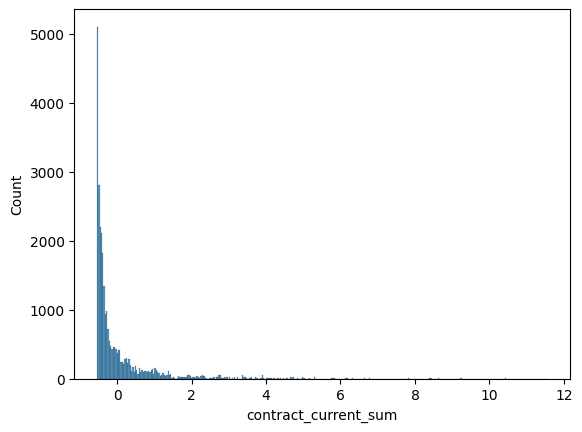

In [47]:
sns.histplot(data=df, x='contract_current_sum')

<Axes: ylabel='contract_current_sum'>

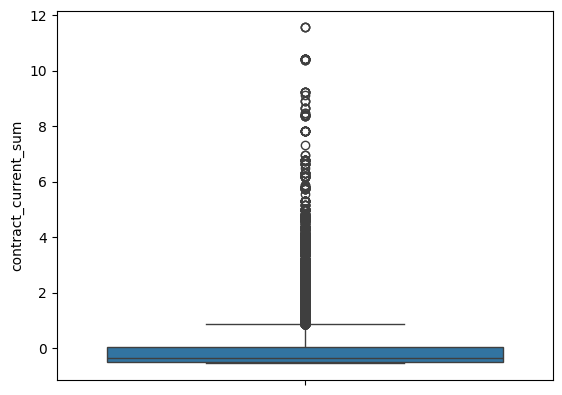

In [49]:
sns.boxplot(data=df, y='contract_current_sum')

In [58]:
IQR = quantile(df.contract_current_sum)
Q3 = df.contract_current_sum.quantile(0.75)
Q3

np.float64(0.0568176969011)

In [61]:
df[df.contract_current_sum < (Q3 + 1.5 * IQR)].index

Index([    0,     2,     3,     4,     8,    12,    13,    15,    16,    17,
       ...
       28821, 28822, 28823, 28824, 28825, 28826, 28827, 28828, 28829, 28830],
      dtype='int64', length=25700)

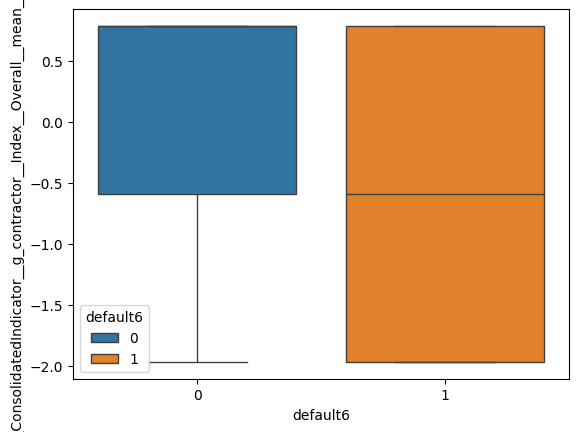

In [67]:
sns.boxplot(data=df, y='agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME', x='default6', hue='default6')
plt.show()

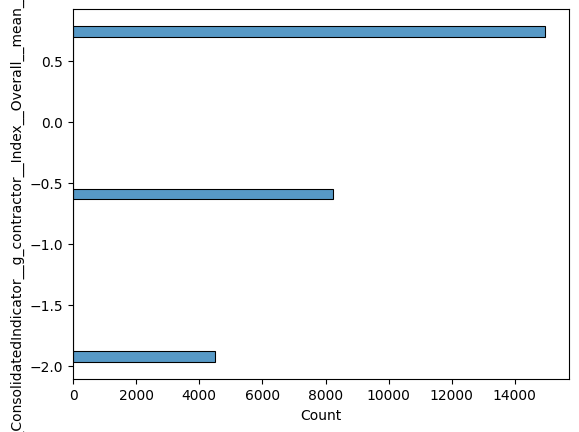

In [74]:
sns.histplot(data=df, y='agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME')
plt.show()


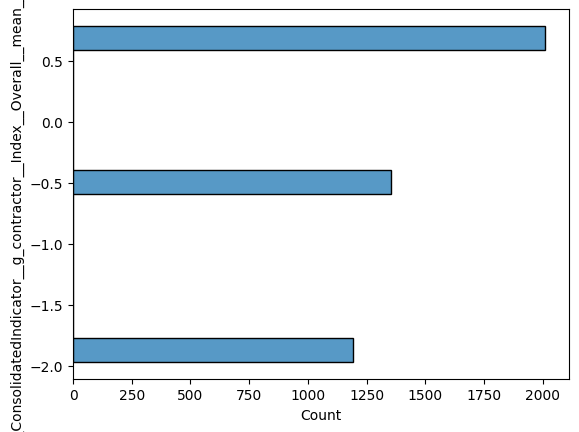

In [77]:
sns.histplot(data=df[df.default6 == 1], y='agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME')
plt.show()


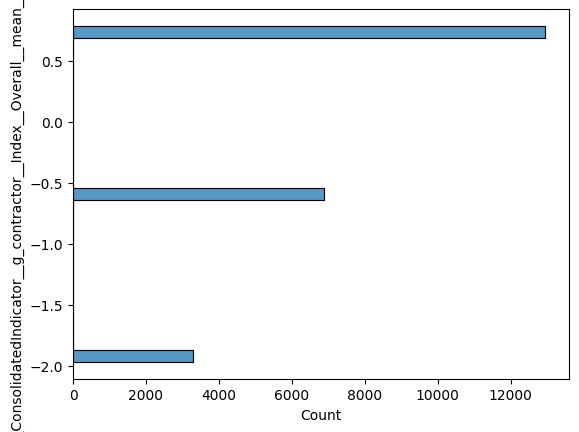

In [78]:
sns.histplot(data=df[df.default6 == 0], y='agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME')
plt.show()

In [76]:
df['agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME'].nunique()

3

<Axes: ylabel='None'>

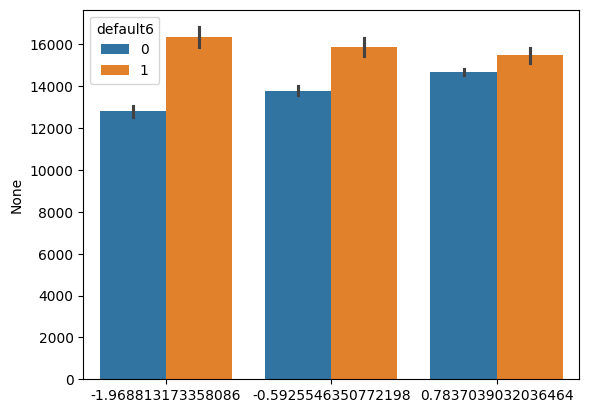

In [91]:
sns.barplot(x = df['agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME'].values, y = df.index, hue = df.default6)

<Axes: ylabel='agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME'>

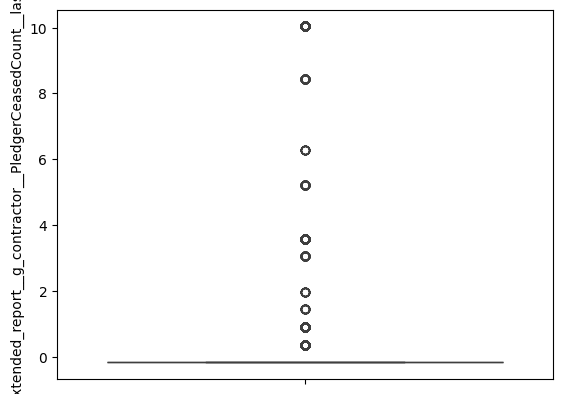

In [80]:
sns.boxplot(data=df, y='agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME')

<Axes: xlabel='agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME', ylabel='Count'>

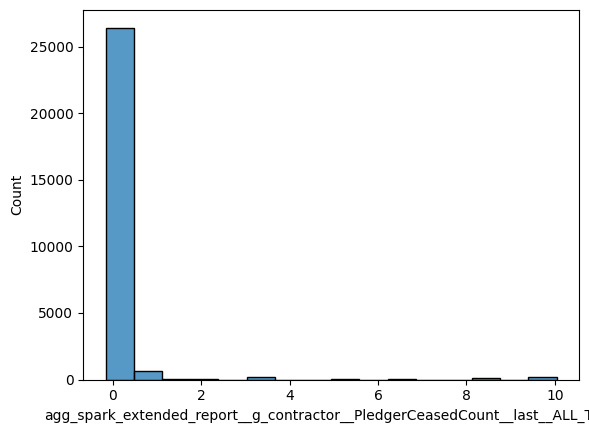

In [83]:
sns.histplot(df['agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME'])

<Axes: xlabel='agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME', ylabel='Count'>

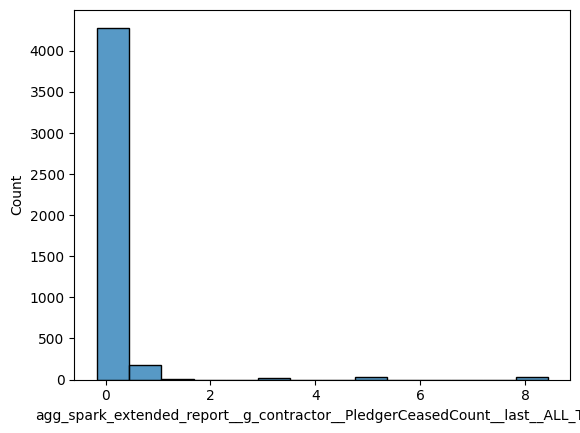

In [84]:
sns.histplot(df[df.default6 == 1], x = 'agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME')

<Axes: ylabel='None'>

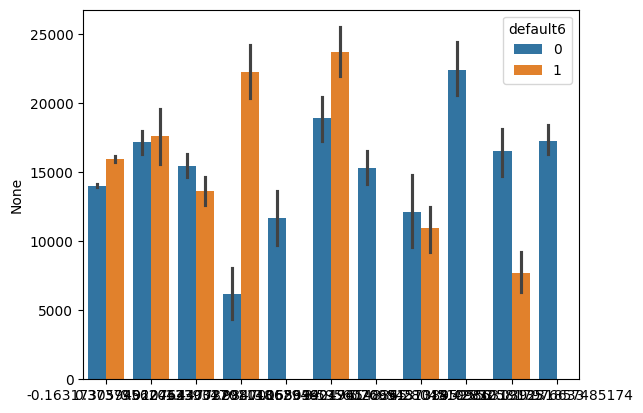

In [90]:
sns.barplot(x = df['agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME'].values, y = df.index, hue = df.default6)

In [85]:
df.agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME.nunique()

4

<Axes: ylabel='None'>

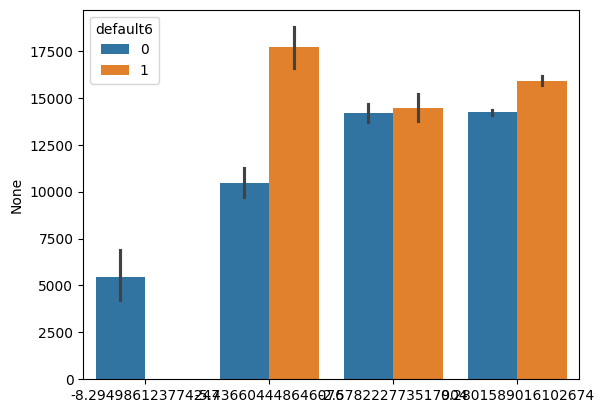

In [89]:
sns.barplot(x = df['agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME'].values, y = df.index, hue = df.default6)

<Axes: >

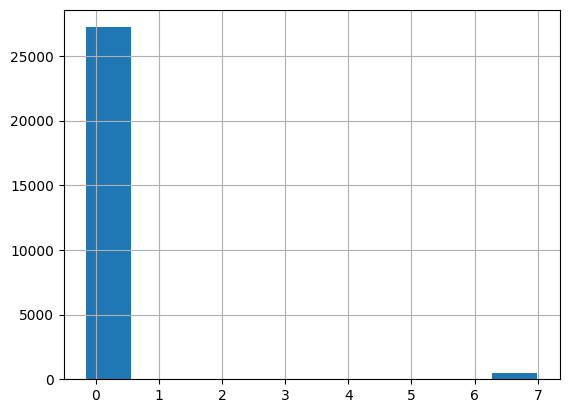

In [93]:
df.agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME.hist()

In [96]:
dates = ['report_date', 'contract_date']
df[dates[0]] = pd.to_datetime(df[dates[0]])
df[dates[1]] = pd.to_datetime(df[dates[1]])

<Axes: xlabel='contract_date', ylabel='contract_current_sum'>

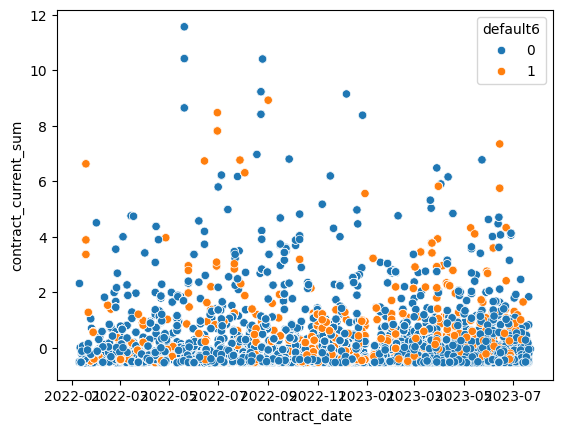

In [99]:
sns.scatterplot(data = df, x = dates[1], y = 'contract_current_sum', hue = 'default6')

<Axes: >

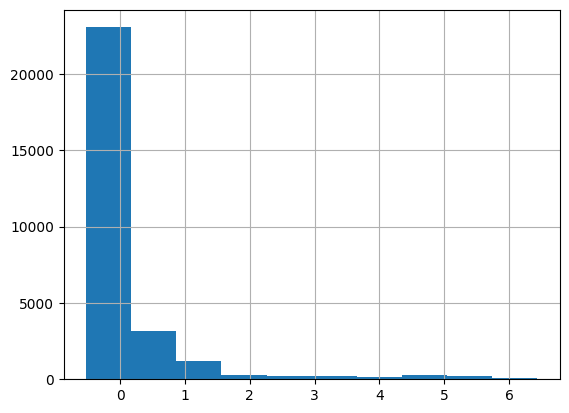

In [118]:
df.counteragent_sum_agg_ks2__g_contract__total_sum__all__sum__ALL_TIME.hist()

In [121]:
c = df.corr()

#### Cols


In [170]:
important = ['agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME',
 'agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME',
 'agg_spark_extended_report__g_contractor__PledgerActiveCount__last__ALL_TIME',
 'agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME',
 'agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME',
 'agg_spark_extended_report__g_contractor__EstimatedLiabilitiesSum__last__ALL_TIME',
 'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME',
 'contract_current_sum',
 'contract_date',
 'agg_materials__g_contract__order_id__countDistinct__12W',
 'agg_ArbitrationCases__g_contractor__DefendantSum__sum__12M',
 'agg_sroomer__g_contractor__sroomer_id__count__ALL_TIME',
 'agg_scontrol__g_contractor__close_delay__defect_type_general_contractor__mean__ALL_TIME',
 'agg_spark_extended_report__g_contractor__PledgeeActiveCount__last__ALL_TIME',
 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W',
 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__4W',
 'agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__ALL_TIME',
 'agg_ConsolidatedIndicator__g_contractor__Index__FailureScore__mean__ALL_TIME',
 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W',
 'contractor_id',
 'agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME',
 'agg_scontrol__g_contractor__close_delay__defect_type_app__mean__ALL_TIME',
 'agg_FinanceAndTaxesFTS__g_contractor__TaxPenaltiesSum__last__ALL_TIME',
 'agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__12_36M']
useless = ['agg_workers__g_contract__fact_workers__all__mean__6W',
 'agg_payments__g_contract__sum__all__sum__8W',
 'agg_cec_requests__g_contract__request_id__all__count__4W',
 'agg_cec_requests__g_contract__created_dt__all__min__ALL_TIME',
 'agg_cec_requests__g_contract__total_sum_accepted__all__sum__12W',
 'agg_workers__g_contract__fact_workers__all__mean__3W',
 'agg_payments__g_contract__date__advance__min__ALL_TIME',
 'agg_cec_requests__g_contract__total_sum_accepted__all__sum__7W',
 'agg_workers__g_contract__fact_workers__all__mean__12W',
 'agg_workers__g_contract__fact_workers__all__mean__4W',
 'agg_workers__g_contract__fact_workers__all__mean__8W',
 'agg_spass_applications__g_contract__appl_count_week__mean__6W',
 'agg_cec_requests__g_contract__total_sum_accepted__all__sum__4W',
 'agg_ks2__g_contract__total_sum__all__sum__8W',
 'agg_cec_requests__g_contract__request_id__all__count__7W',
 'agg_cec_requests__g_contract__created_dt__accepted__min__ALL_TIME']

average = ['project_id',
 'agg_spark_extended_report__g_contractor__CompanySizeRevenue__last__ALL_TIME',
 'agg_ks2__g_contract__id__all__count__8W',
 'agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__12_24M',
 'specialization_id',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__ALL_TIME',
 'agg_materials__g_contract__order_id__countDistinct__ALL_TIME',
 'agg_workers__g_contract__fact_workers__all__mean__2W',
 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__2W',
 'agg_scontrol__g_contractor__close_delay__defect_type_author_supervision__mean__ALL_TIME',
 'agg_ArbitrationCases__g_contractor__DefendantSum__sum__12_36M',
 'counteragent_sum_agg_cec_requests__g_contract__request_id__all__count__ALL_TIME',
 'building_id',
 'agg_scontrol__g_contractor__close_delay__defect_type_arch_supervision__mean__ALL_TIME',
 'agg_materials__g_contract__material_id__countDistinct__ALL_TIME',
 'report_date',
 'agg_scontrol__g_contractor__close_delay__defect_type_tech_supervision__mean__ALL_TIME',
 'agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME',
 'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__last__ALL_TIME',
 'agg_sroomer__g_contractor__sroomer_id__count__12M',
 'agg_cec_requests__g_contract__request_id__all__count__ALL_TIME',
 'counteragent_mean_agg_ks2__g_contract__total_sum__all__sum__ALL_TIME',
 'agg_payments__g_contract__sum__all__countDistinct__ALL_TIME',
 'agg_workers__g_contract__fact_workers__all__mean__ALL_TIME',
 'agg_spark_extended_report__g_contractor__EstimatedClaimsSum__last__ALL_TIME',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__6M',
 'agg_ks2__g_contract__id__all__count__ALL_TIME',
 'agg_ks2__g_contract__total_sum__all__sum__ALL_TIME',
 'agg_spark_extended_report__g_contractor__EstimatedNetLiabilitiesSum__last__ALL_TIME',
 'agg_scontrol__g_contractor__close_delay__defect_type_labour_protection__mean__ALL_TIME',
 'agg_ArbitrationCases__g_contractor__DefendantSum__sum__12_48M',
 'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__mean__ALL_TIME',
 'specialization_sum_agg_ks2__g_contract__total_sum__all__sum__ALL_TIME',
 'agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME',
 'counteragent_mean_agg_spass_applications__g_contract__appl_count_week__mean__ALL_TIME',
 'agg_payments__g_contract__sum__all__countDistinct__12W',
 'agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__12_48M',
 'agg_ArbitrationCases__g_contractor__DefendantSum__sum__ALL_TIME',
 'contract_date',
 'agg_FinanceAndTaxesFTS__g_contractor__Expenses__last__ALL_TIME',
 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__ALL_TIME',
 'agg_ConsolidatedIndicator__g_contractor__Index__PaymentIndex__mean__ALL_TIME',
 'specialization_sum_agg_payments__g_contract__sum__all__sum__ALL_TIME',
 'agg_materials__g_contract__order_dt__min__ALL_TIME',
 'agg_scontrol__g_contractor__close_delay__defect_type_repair__mean__ALL_TIME',
 'agg_spass_applications__g_contract__appl_count_week__max__ALL_TIME',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__7M',
 'agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__12M',
 'agg_FinanceAndTaxesFTS__g_contractor__TaxArrearsSum__last__ALL_TIME',
 'contract_init_sum',
 'agg_Finance__g_contractor__Value__Capital__last__ALL_TIME',
 'counteragent_sum_agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME',
 'counteragent_mean_agg_payments__g_contract__sum__all__sum__ALL_TIME',
 'agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME',
 'agg_Finance__g_contractor__Value__CurrentAssets__last__ALL_TIME',
 'agg_materials__g_contract__order_id__countDistinct__8W',
 'agg_FinanceAndTaxesFTS__g_contractor__Income__last__ALL_TIME',
 'agg_FinanceAndTaxesFTS__g_contractor__TaxesSum__last__ALL_TIME',
 'contract_id',
 'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__mean__ALL_TIME',
 'agg_Finance__g_contractor__Value__FixedAssets__last__ALL_TIME',
 'counteragent_sum_agg_ks2__g_contract__total_sum__all__sum__ALL_TIME',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__5M',
 'agg_spass_applications__g_contract__appl_count_week__mean__ALL_TIME',
 'agg_sroomer__g_contractor__sroomer_id__count__6M',
 'agg_workers__g_contract__fact_workers__all__mean__1W',
 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__8W',
 'agg_ArbitrationCases__g_contractor__DefendantSum__sum__12_24M',
 'agg_spass_applications__g_specialization__appl_count_week__mean__ALL_TIME',
 'agg_Finance__g_contractor__Value__ShortLiabilities__last__ALL_TIME',
 'agg_cec_requests__g_contract__request_id__all__count__6W',
 'agg_Finance__g_contractor__Value__Balance__last__ALL_TIME',
 'agg_spass_applications__g_contract__appl_count_week__mean__26W',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__4M',
 'agg_sroomer__g_contractor__sroomer_id__count__3M',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__8M',
 'agg_payments__g_contract__sum__all__sum__12W',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__12M',
 'agg_spass_applications__g_contract__appl_count_week__mean__12W',
 'counteragent_sum_agg_payments__g_contract__sum__all__sum__ALL_TIME',
 'agg_Finance__g_contractor__Value__Revenue_y__last__ALL_TIME',
 'agg_payments__g_contract__sum__all__sum__ALL_TIME',
 'agg_cec_requests__g_contract__request_id__all__count__12W',
 'agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME',
 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__52W',
 'agg_cec_requests__g_contract__total_sum_accepted__all__sum__8W',
 'agg_cec_requests__g_contract__time_btw_requests__all__mean__2M',
 'agg_ks2__g_contract__total_sum__all__sum__12W',
 'agg_spass_applications__g_contract__appl_count_week__mean__8W',
 'agg_cec_requests__g_contract__request_id__all__count__5W',
 'agg_cec_requests__g_contract__request_id__all__count__8W',
 'agg_workers__g_contract__fact_workers__all__mean__26W',
 'agg_materials__g_contract__order_id__countDistinct__4W',
 'agg_Finance__g_contractor__Value__CostPrice_y__last__ALL_TIME']

#### Important for model features


In [130]:
df['agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME'].nunique() #  Средний общий индекс подрядчика за все время                                                           

3

In [131]:
df['agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME'].nunique() #  Средний индекс добросовестности подрядчика за все время                                             

4

In [132]:
df['agg_spark_extended_report__g_contractor__PledgerActiveCount__last__ALL_TIME'].nunique() #  количество активных залогов  в качестве залогодателя 

7

In [133]:
df['agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME'].nunique() # Кредитный лимит

290

In [134]:
df['agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME'].nunique() #  количество прекращенных залогов в качестве залогодателя

11

In [135]:
df['agg_spark_extended_report__g_contractor__EstimatedLiabilitiesSum__last__ALL_TIME'].nunique() # оценочная сумма обязательств подрядчика за все время

97

In [137]:
df['agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME'].nunique() #  Последнее относительное изменение цены контракта за все время                                          

720

In [138]:
df['contract_current_sum'].nunique() # Текущая сумма контракта

3765

In [139]:
df['contract_date'].nunique() # Дата заключения контракта

429

In [140]:
df['agg_materials__g_contract__order_id__countDistinct__12W'].nunique() # Кол-во заказов материалов по договору

117

In [142]:
df['agg_ArbitrationCases__g_contractor__DefendantSum__sum__12M'].nunique() # Сумма исков подрядчика в качестве ответчика за период  12 месяцев                                                   

388

In [144]:
df['agg_sroomer__g_contractor__sroomer_id__count__ALL_TIME'].nunique() # Кол-во дефектов по договору

692

In [145]:
df['agg_scontrol__g_contractor__close_delay__defect_type_general_contractor__mean__ALL_TIME'].nunique() # Средняя задержка закрытия дефектов типа "генеральный подрядчик" за все время                           

227

In [146]:
df['agg_spark_extended_report__g_contractor__PledgeeActiveCount__last__ALL_TIME'].nunique() # количество активных залогов  в качестве залогодержателя

2

In [148]:
df['agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W'].nunique() # Количество  предложений подрядчика в тендерах за 12 неделю

157

In [150]:
df['agg_tender_proposal__g_contractor__id__ALL__countDistinct__4W'].nunique() # Количество  предложений подрядчика в тендерах за 3 неделю

101

In [152]:
df['agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__ALL_TIME'].nunique() # Сумма исков подрядчика в качестве исца за все время

336

In [154]:
df['agg_ConsolidatedIndicator__g_contractor__Index__FailureScore__mean__ALL_TIME'].nunique() # Средний индекс отказов подрядчика за все время

4

In [155]:
df['agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W'].nunique() # agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W

171

In [157]:
df['contractor_id'].nunique() # Идентификатор подрядчика

646

In [158]:
df['agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME'].nunique() # Кол-во уникальных типов материалов, заказанных по договору

74

In [159]:
df['agg_scontrol__g_contractor__close_delay__defect_type_app__mean__ALL_TIME'].nunique() # Средняя задержка закрытия дефектов типа "приложение" за все время

18

In [162]:
df['agg_FinanceAndTaxesFTS__g_contractor__TaxPenaltiesSum__last__ALL_TIME'].nunique() # Сумма налоговых штрафов

31

In [164]:
df['agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__12_36M'].nunique() # Сумма исков подрядчикав качестве исца за период от 12 до 36 месяцев

274

#### Average features


In [171]:
for i in average:
    print(i, df[i].nunique())

project_id 50
agg_spark_extended_report__g_contractor__CompanySizeRevenue__last__ALL_TIME 544
agg_ks2__g_contract__id__all__count__8W 9
agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__12_24M 231
specialization_id 31
agg_cec_requests__g_contract__time_btw_requests__all__mean__ALL_TIME 2272
agg_materials__g_contract__order_id__countDistinct__ALL_TIME 146
agg_workers__g_contract__fact_workers__all__mean__2W 637
agg_tender_proposal__g_contractor__id__ALL__countDistinct__2W 72
agg_scontrol__g_contractor__close_delay__defect_type_author_supervision__mean__ALL_TIME 249
agg_ArbitrationCases__g_contractor__DefendantSum__sum__12_36M 342
counteragent_sum_agg_cec_requests__g_contract__request_id__all__count__ALL_TIME 1230
building_id 595
agg_scontrol__g_contractor__close_delay__defect_type_arch_supervision__mean__ALL_TIME 59
agg_materials__g_contract__material_id__countDistinct__ALL_TIME 212
report_date 30
agg_scontrol__g_contractor__close_delay__defect_type_tech_supervision__mean__ALL_TIME

#### Trash features


In [172]:
for i in useless:
    print(i, df[i].nunique())

agg_workers__g_contract__fact_workers__all__mean__6W 1149
agg_payments__g_contract__sum__all__sum__8W 3746
agg_cec_requests__g_contract__request_id__all__count__4W 84
agg_cec_requests__g_contract__created_dt__all__min__ALL_TIME 327
agg_cec_requests__g_contract__total_sum_accepted__all__sum__12W 4313
agg_workers__g_contract__fact_workers__all__mean__3W 835
agg_payments__g_contract__date__advance__min__ALL_TIME 185
agg_cec_requests__g_contract__total_sum_accepted__all__sum__7W 4359
agg_workers__g_contract__fact_workers__all__mean__12W 1636
agg_workers__g_contract__fact_workers__all__mean__4W 978
agg_workers__g_contract__fact_workers__all__mean__8W 1376
agg_spass_applications__g_contract__appl_count_week__mean__6W 204
agg_cec_requests__g_contract__total_sum_accepted__all__sum__4W 3573
agg_ks2__g_contract__total_sum__all__sum__8W 3626
agg_cec_requests__g_contract__request_id__all__count__7W 122
agg_cec_requests__g_contract__created_dt__accepted__min__ALL_TIME 320


# Analyze


In [173]:
df['Income_minus_all'] = df['agg_FinanceAndTaxesFTS__g_contractor__Income__last__ALL_TIME'] - (df['agg_FinanceAndTaxesFTS__g_contractor__Expenses__last__ALL_TIME'] + df['agg_FinanceAndTaxesFTS__g_contractor__TaxArrearsSum__last__ALL_TIME'] + df['agg_FinanceAndTaxesFTS__g_contractor__TaxPenaltiesSum__last__ALL_TIME'] + df['agg_FinanceAndTaxesFTS__g_contractor__TaxesSum__last__ALL_TIME'])

<Axes: xlabel='Income_minus_all', ylabel='contract_init_sum'>

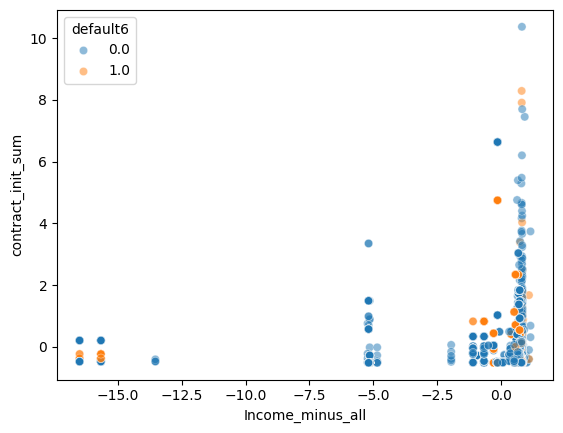

In [201]:
sns.scatterplot(x = df['Income_minus_all'], y = df.loc[df.Income_minus_all.dropna().index].contract_init_sum, hue = df.loc[df.Income_minus_all.dropna().index].default6, alpha = 0.5)

<Axes: xlabel='Income_minus_all', ylabel='contract_current_sum'>

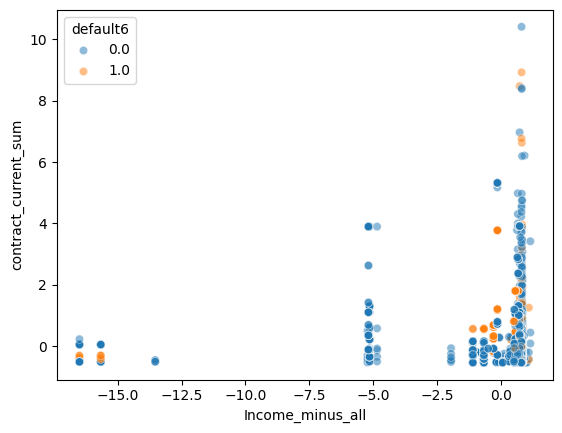

In [203]:
sns.scatterplot(x = df['Income_minus_all'], y = df.loc[df.Income_minus_all.dropna().index].contract_current_sum, hue = df.loc[df.Income_minus_all.dropna().index].default6, alpha = 0.5)

<Axes: >

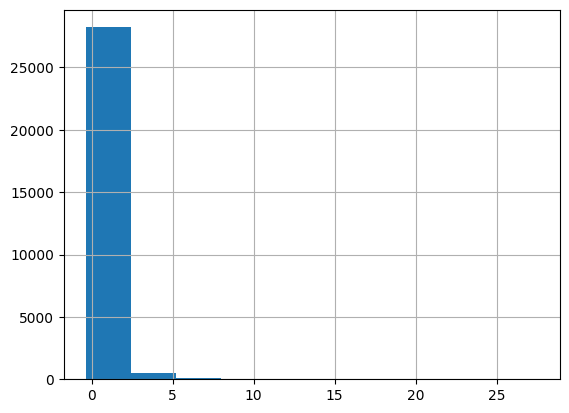

In [206]:
# 2
df.agg_cec_requests__g_contract__request_id__all__count__ALL_TIME.hist()

In [213]:
df.agg_cec_requests__g_contract__request_id__all__count__ALL_TIME.nunique()

246

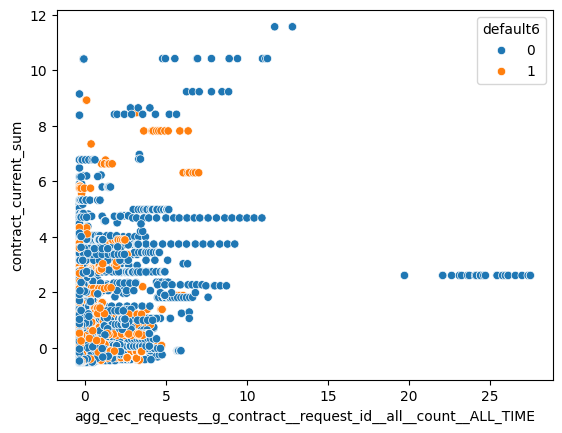

In [285]:
sns.scatterplot(data = df, x = 'agg_cec_requests__g_contract__request_id__all__count__ALL_TIME', y = 'contract_current_sum', hue = 'default6')
df['subms_count_prod_contract_curr_sum'] = df.agg_cec_requests__g_contract__request_id__all__count__ALL_TIME * df.contract_current_sum

In [286]:
df

,contract_id,report_date,specialization_id,contract_init_sum,contract_date,project_id,building_id,contractor_id,contract_current_sum,agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME,...,agg_tender_proposal__g_contractor__id__ALL__countDistinct__8W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__52W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__ALL_TIME,default6,Income_minus_all,agg_cec_requests__g_contract__total_sum_rejected__all__sum__ALL_TIME,IndexOfDueDiligence_prod_CreditLimitSum,subms_count_prod_contract_curr_sum
0,5433,2023-01-01,18,1.115267,2022-05-10 21:00:00,43,701,438,0.793952,-0.539030,...,-0.190966,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-0.932917,-0.031876,0.115448
1,6875,2023-01-01,18,1.608002,2022-08-21 21:00:00,31,268,438,2.681675,0.743673,...,-0.190966,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-1.042694,-0.031876,1.307624
2,1476,2023-01-01,18,-0.360764,2022-10-17 21:00:00,31,268,438,-0.416432,-0.539030,...,-0.190966,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,0.019010,-0.031876,0.138954
3,4469,2023-01-01,12,-0.089303,2022-04-20 21:00:00,43,697,484,-0.193827,-0.539030,...,-0.190966,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-0.258230,-0.041857,0.004980
4,1330,2023-01-01,12,-0.515778,2022-03-02 21:00:00,49,224,484,0.133446,0.743673,...,-0.190966,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-0.873302,-0.041857,-0.021695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,5078,2023-07-23,21,-0.484227,2023-04-13 21:00:00,18,915,683,-0.504509,0.743673,...,-0.095692,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.168344
28827,3854,2023-07-23,21,-0.500003,2023-04-13 21:00:00,18,915,683,-0.524174,0.743673,...,-0.095692,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.174906
28828,5351,2023-07-23,21,-0.481102,2023-07-16 21:00:00,50,298,683,-0.515112,-0.539030,...,-0.095692,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.171882
28829,57,2023-07-23,21,-0.468450,2023-03-16 21:00:00,45,915,683,-0.504737,-0.539030,...,-0.095692,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.168420


<Axes: >

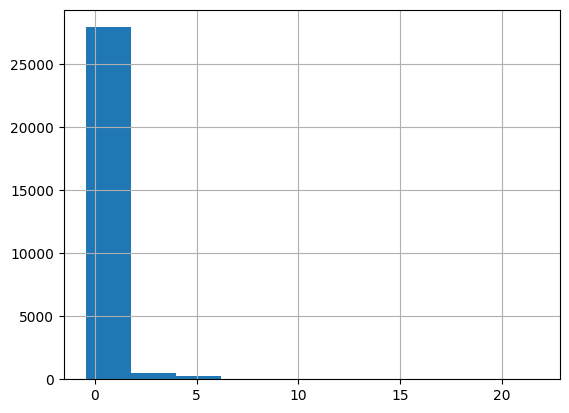

In [212]:
df.agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME.hist()

In [211]:
df.agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME.nunique()

3405

<Axes: xlabel='agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME', ylabel='contract_current_sum'>

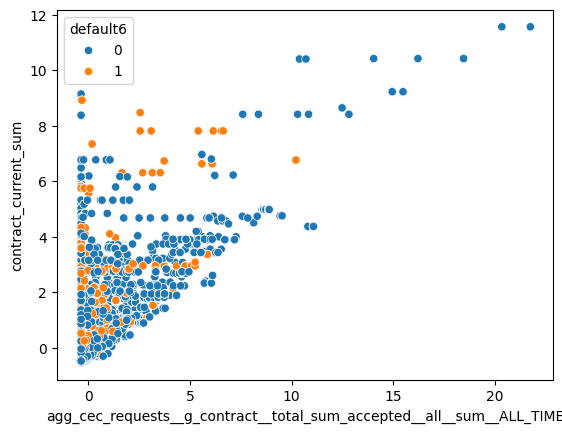

In [214]:
sns.scatterplot(data = df, x = 'agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME', y = 'contract_current_sum', hue = 'default6')

In [216]:
df['agg_cec_requests__g_contract__total_sum_rejected__all__sum__ALL_TIME'] = df['agg_cec_requests__g_contract__request_id__all__count__ALL_TIME'] - df['agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME']
df.agg_cec_requests__g_contract__total_sum_rejected__all__sum__ALL_TIME.nunique()

4733

<Axes: xlabel='agg_cec_requests__g_contract__total_sum_rejected__all__sum__ALL_TIME', ylabel='contract_current_sum'>

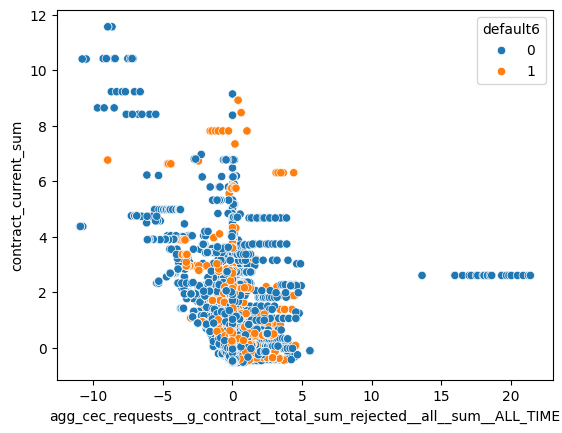

In [218]:
sns.scatterplot(data = df, x = 'agg_cec_requests__g_contract__total_sum_rejected__all__sum__ALL_TIME', y = 'contract_current_sum', hue = 'default6')

<Axes: >

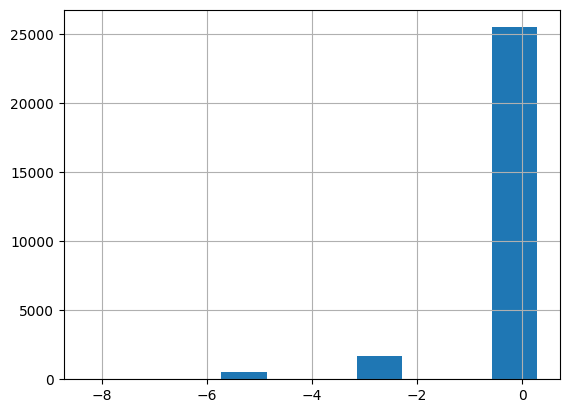

In [221]:
# 3
df.agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME.hist()

In [232]:
percent_df_indexofDuediligence = df.groupby('agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME').default6.mean().to_frame().reset_index()

<Axes: xlabel='agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME', ylabel='default6'>

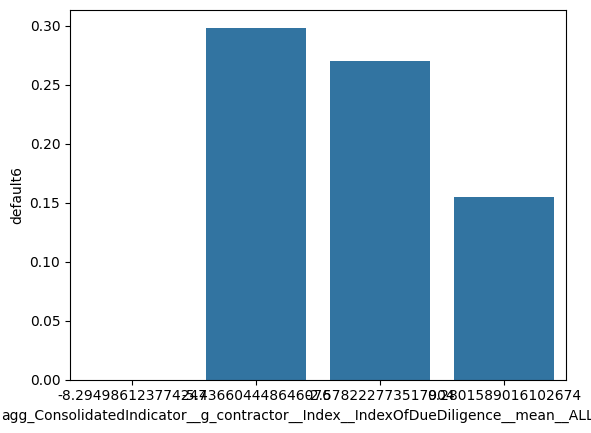

In [234]:
sns.barplot(data = percent_df_indexofDuediligence, x = percent_df_indexofDuediligence.columns[0], y='default6')

In [240]:
df.groupby('agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME').default6.agg(['mean', 'count']).reset_index()

,agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME,mean,count
0,-8.294986,0.000000,19
1,-5.436604,0.298419,506
2,-2.578223,0.270497,1671
3,0.280159,0.154959,25510


In [256]:
df.groupby('agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME').agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME.agg(['mean', 'count']).reset_index()

,agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME,mean,count
0,-8.294986,-0.151915,19
1,-5.436604,-0.149833,506
2,-2.578223,-0.149208,1671
3,0.280159,-0.006320,25510


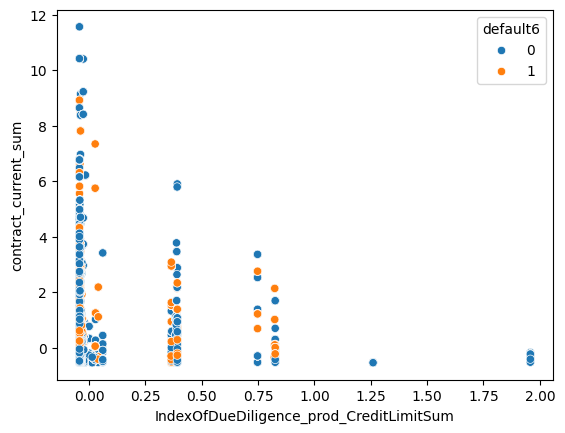

307

In [267]:
df['IndexOfDueDiligence_prod_CreditLimitSum'] = df.agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME * df.agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME
sns.scatterplot(data = df, x = 'IndexOfDueDiligence_prod_CreditLimitSum', y = 'contract_current_sum', hue = 'default6')
plt.show()
df.IndexOfDueDiligence_prod_CreditLimitSum.nunique()

In [269]:
df.IndexOfDueDiligence_prod_CreditLimitSum.min(), df.IndexOfDueDiligence_prod_CreditLimitSum.max()

(np.float64(-0.04256025768318871), np.float64(1.9579940182861995))

<Axes: >

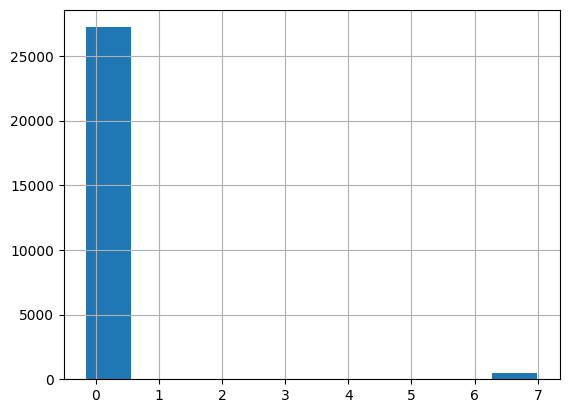

In [243]:
# 4
df.agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME.hist()

In [244]:
df.agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME.nunique()

290

<Axes: >

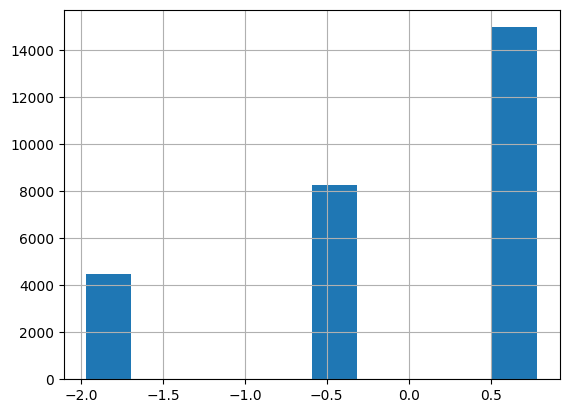

In [245]:
df.agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME.hist()

In [255]:
df.groupby('agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME').agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME.agg(['mean', 'count'])

,mean,count
agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME,,
-1.968813,-0.148302,4495
-0.592555,-0.148600,8242
0.783704,0.093668,14969


In [254]:
df.groupby('agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME').default6.agg(['mean', 'count'])

,mean,count
agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME,,
-1.968813,0.265406,4495
-0.592555,0.164038,8242
0.783704,0.134344,14969


In [272]:
# 5
df.agg_materials__g_contract__order_id__countDistinct__12W.nunique()

117

In [273]:
df.agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W.nunique()

157

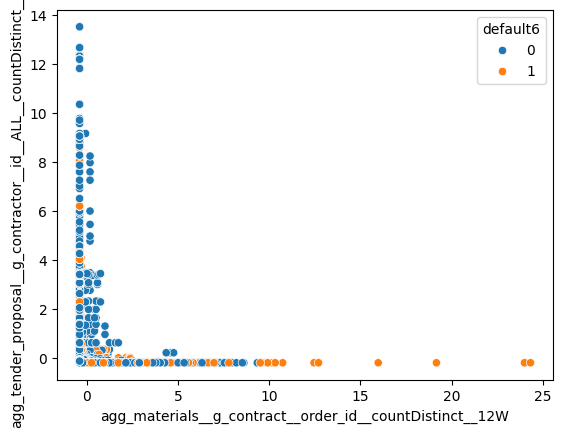

In [276]:
sns.scatterplot(data = df, x = 'agg_materials__g_contract__order_id__countDistinct__12W', y = 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W', hue = 'default6')
plt.show()

<Axes: >

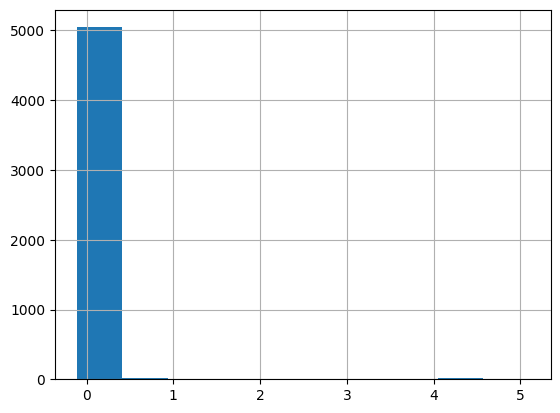

In [278]:
df.agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME.hist()

In [279]:
df.agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME.nunique()

720

<Axes: xlabel='agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME', ylabel='agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W'>

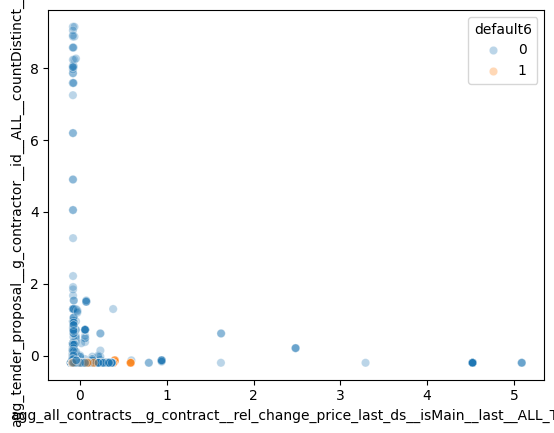

In [282]:
sns.scatterplot(data = df, x = 'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME', y = 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W', hue = 'default6', alpha = 0.3)

In [283]:
df['']

1       -0.018600
6       -0.080413
7       -0.080737
9       -0.072274
10      -0.080658
           ...   
28791   -0.040887
28802   -0.075190
28820   -0.087244
28826   -0.043946
28827   -0.044780
Name: agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME, Length: 5095, dtype: float64

In [289]:
# 6
df.agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME.nunique()

720

In [290]:
df.agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME.nunique()

74

,contract_id,report_date,specialization_id,contract_init_sum,contract_date,project_id,building_id,contractor_id,contract_current_sum,agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME,...,agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__52W,agg_tender_proposal__g_contractor__id__ALL__countDistinct__ALL_TIME,default6,Income_minus_all,agg_cec_requests__g_contract__total_sum_rejected__all__sum__ALL_TIME,IndexOfDueDiligence_prod_CreditLimitSum,subms_count_prod_contract_curr_sum,defects_with_materials
0,5433,2023-01-01,18,1.115267,2022-05-10 21:00:00,43,701,438,0.793952,-0.539030,...,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-0.932917,-0.031876,0.115448,-2.979261
1,6875,2023-01-01,18,1.608002,2022-08-21 21:00:00,31,268,438,2.681675,0.743673,...,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-1.042694,-0.031876,1.307624,-1.932617
2,1476,2023-01-01,18,-0.360764,2022-10-17 21:00:00,31,268,438,-0.416432,-0.539030,...,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,0.019010,-0.031876,0.138954,0.160671
3,4469,2023-01-01,12,-0.089303,2022-04-20 21:00:00,43,697,484,-0.193827,-0.539030,...,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-0.258230,-0.041857,0.004980,0.087678
4,1330,2023-01-01,12,-0.515778,2022-03-02 21:00:00,49,224,484,0.133446,0.743673,...,-0.200348,-0.225724,-0.256704,-0.258454,0,NaN,-0.873302,-0.041857,-0.021695,0.087678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,5078,2023-07-23,21,-0.484227,2023-04-13 21:00:00,18,915,683,-0.504509,0.743673,...,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.168344,0.170088
28827,3854,2023-07-23,21,-0.500003,2023-04-13 21:00:00,18,915,683,-0.524174,0.743673,...,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.174906,0.170088
28828,5351,2023-07-23,21,-0.481102,2023-07-16 21:00:00,50,298,683,-0.515112,-0.539030,...,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.171882,0.170088
28829,57,2023-07-23,21,-0.468450,2023-03-16 21:00:00,45,915,683,-0.504737,-0.539030,...,-0.132309,0.179293,0.150820,0.148360,0,NaN,0.019010,-0.042560,0.168420,0.170088


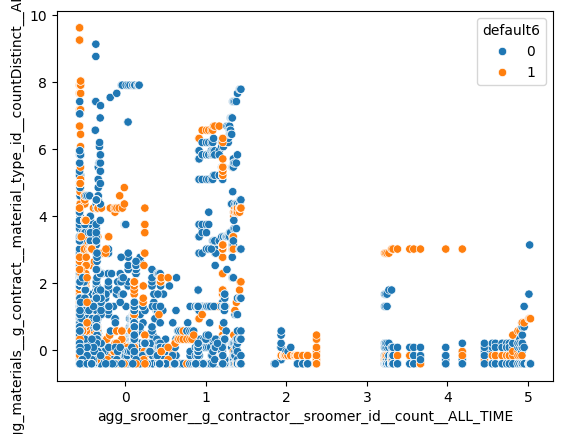

In [294]:
sns.scatterplot(data = df, y = 'agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME', x = 'agg_sroomer__g_contractor__sroomer_id__count__ALL_TIME', hue = 'default6')
df['defects_with_materials'] = df['agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME'] * df['agg_sroomer__g_contractor__sroomer_id__count__ALL_TIME']
df

In [296]:
# 7
df.agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W.nunique()

157

<Axes: xlabel='agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W', ylabel='contract_current_sum'>

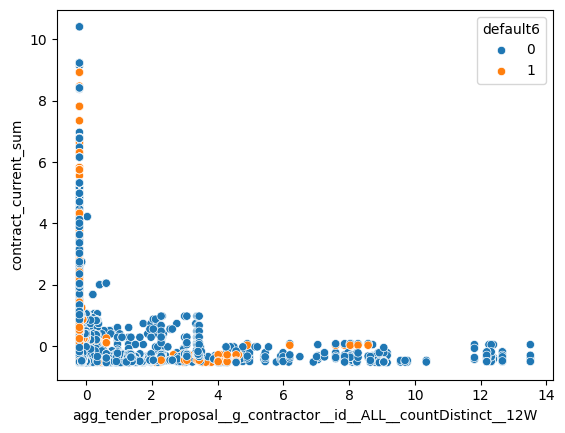

In [355]:
sns.scatterplot(data = df, x = 'agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W', y = 'contract_current_sum', hue = 'default6')

In [364]:
df['report_date'] = pd.to_datetime(df['report_date'])
df['contract_date'] = pd.to_datetime(df['contract_date'])
best = df[important]

In [373]:
column_mapping = {
    "agg_ConsolidatedIndicator_g_contractor_Index__Overall__mean__ALL_TIME": "Overall_Index",
    "agg_ConsolidatedIndicator_g_contractor_Index__IndexOfDueDiligence__mean__ALL_TIME": "DueDiligence_Index",
    "agg_spark_extended_report__g_contractor__PledgerActiveCount__last__ALL_TIME": "PledgerActiveCount",
    "agg_spark_extended_report__g_contractor__CreditLimitSum__last__ALL_TIME": "CreditLimitSum",
    "agg_spark_extended_report__g_contractor__PledgerCeasedCount__last__ALL_TIME": "PledgrerCeasedCount",
    "agg_spark_extended_report__g_contractor__EstimatedLiabilitiesSum__last__ALL_TIME": "EstimatedLiabilitiesSum",
    "agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME": "red_change_price",
    "contract_current_sum": "contract_current_sum",
    "agg_materials__g_contract__order_id__countDistinct__12W": "order_id_12W",
    "agg_tender_proposal__g_contractor__id__ALL__countDistinct__12W": "countDistinct_12W",
    "agg_tender_proposal__g_contractor__id__ALL__countDistinct__4W": "countDistinct_4W",
    "agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__ALL_TIME": "PlaintiffSum_ALL_TIME",
    "agg_ConsolidatedIndicator__g_contractor__Index__FailureScore__mean__ALL_TIME": "FailureScore",
    "agg_tender_proposal__g_contractor__id__ALL__countDistinct__26W": "countDistinct_26W",
    "agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME": "countDistinct_ALL_TIME",
    "agg_scontrol__g_contractor__close_delay__defect_type_app__mean__ALL_TIME": "defect_type_app",
    "agg_FinanceAndTaxesFTS__g_contractor__TaxPenaltiesSum__last__ALL_TIME": "TaxPenaltiesSum",
    "agg_ArbitrationCases__g_contractor__PlaintiffSum__sum__12_36M": "PlaintiffSum_12_36M",
    "agg_ConsolidatedIndicator__g_contractor__Index__Overall__mean__ALL_TIME": "OverAll_ALL_TIME",
    "agg_ConsolidatedIndicator__g_contractor__Index__IndexOfDueDiligence__mean__ALL_TIME": "IndexOfDueDiligence",
    "agg_ArbitrationCases__g_contractor__DefendantSum__sum__12M": "DefendantSum_12M",
    "agg_sroomer__g_contractor__sroomer_id__count__ALL_TIME": "sroomed_id_ALL_TIME",
    "agg_scontrol__g_contractor__close_delay__defect_type_general_contractor__mean__ALL_TIME": "defect_type_general_ALLt",
    "agg_spark_extended_report__g_contractor__PledgeeActiveCount__last__ALL_TIME": "PledgeeActiveCount_last"
}
best = best.rename(columns=column_mapping)

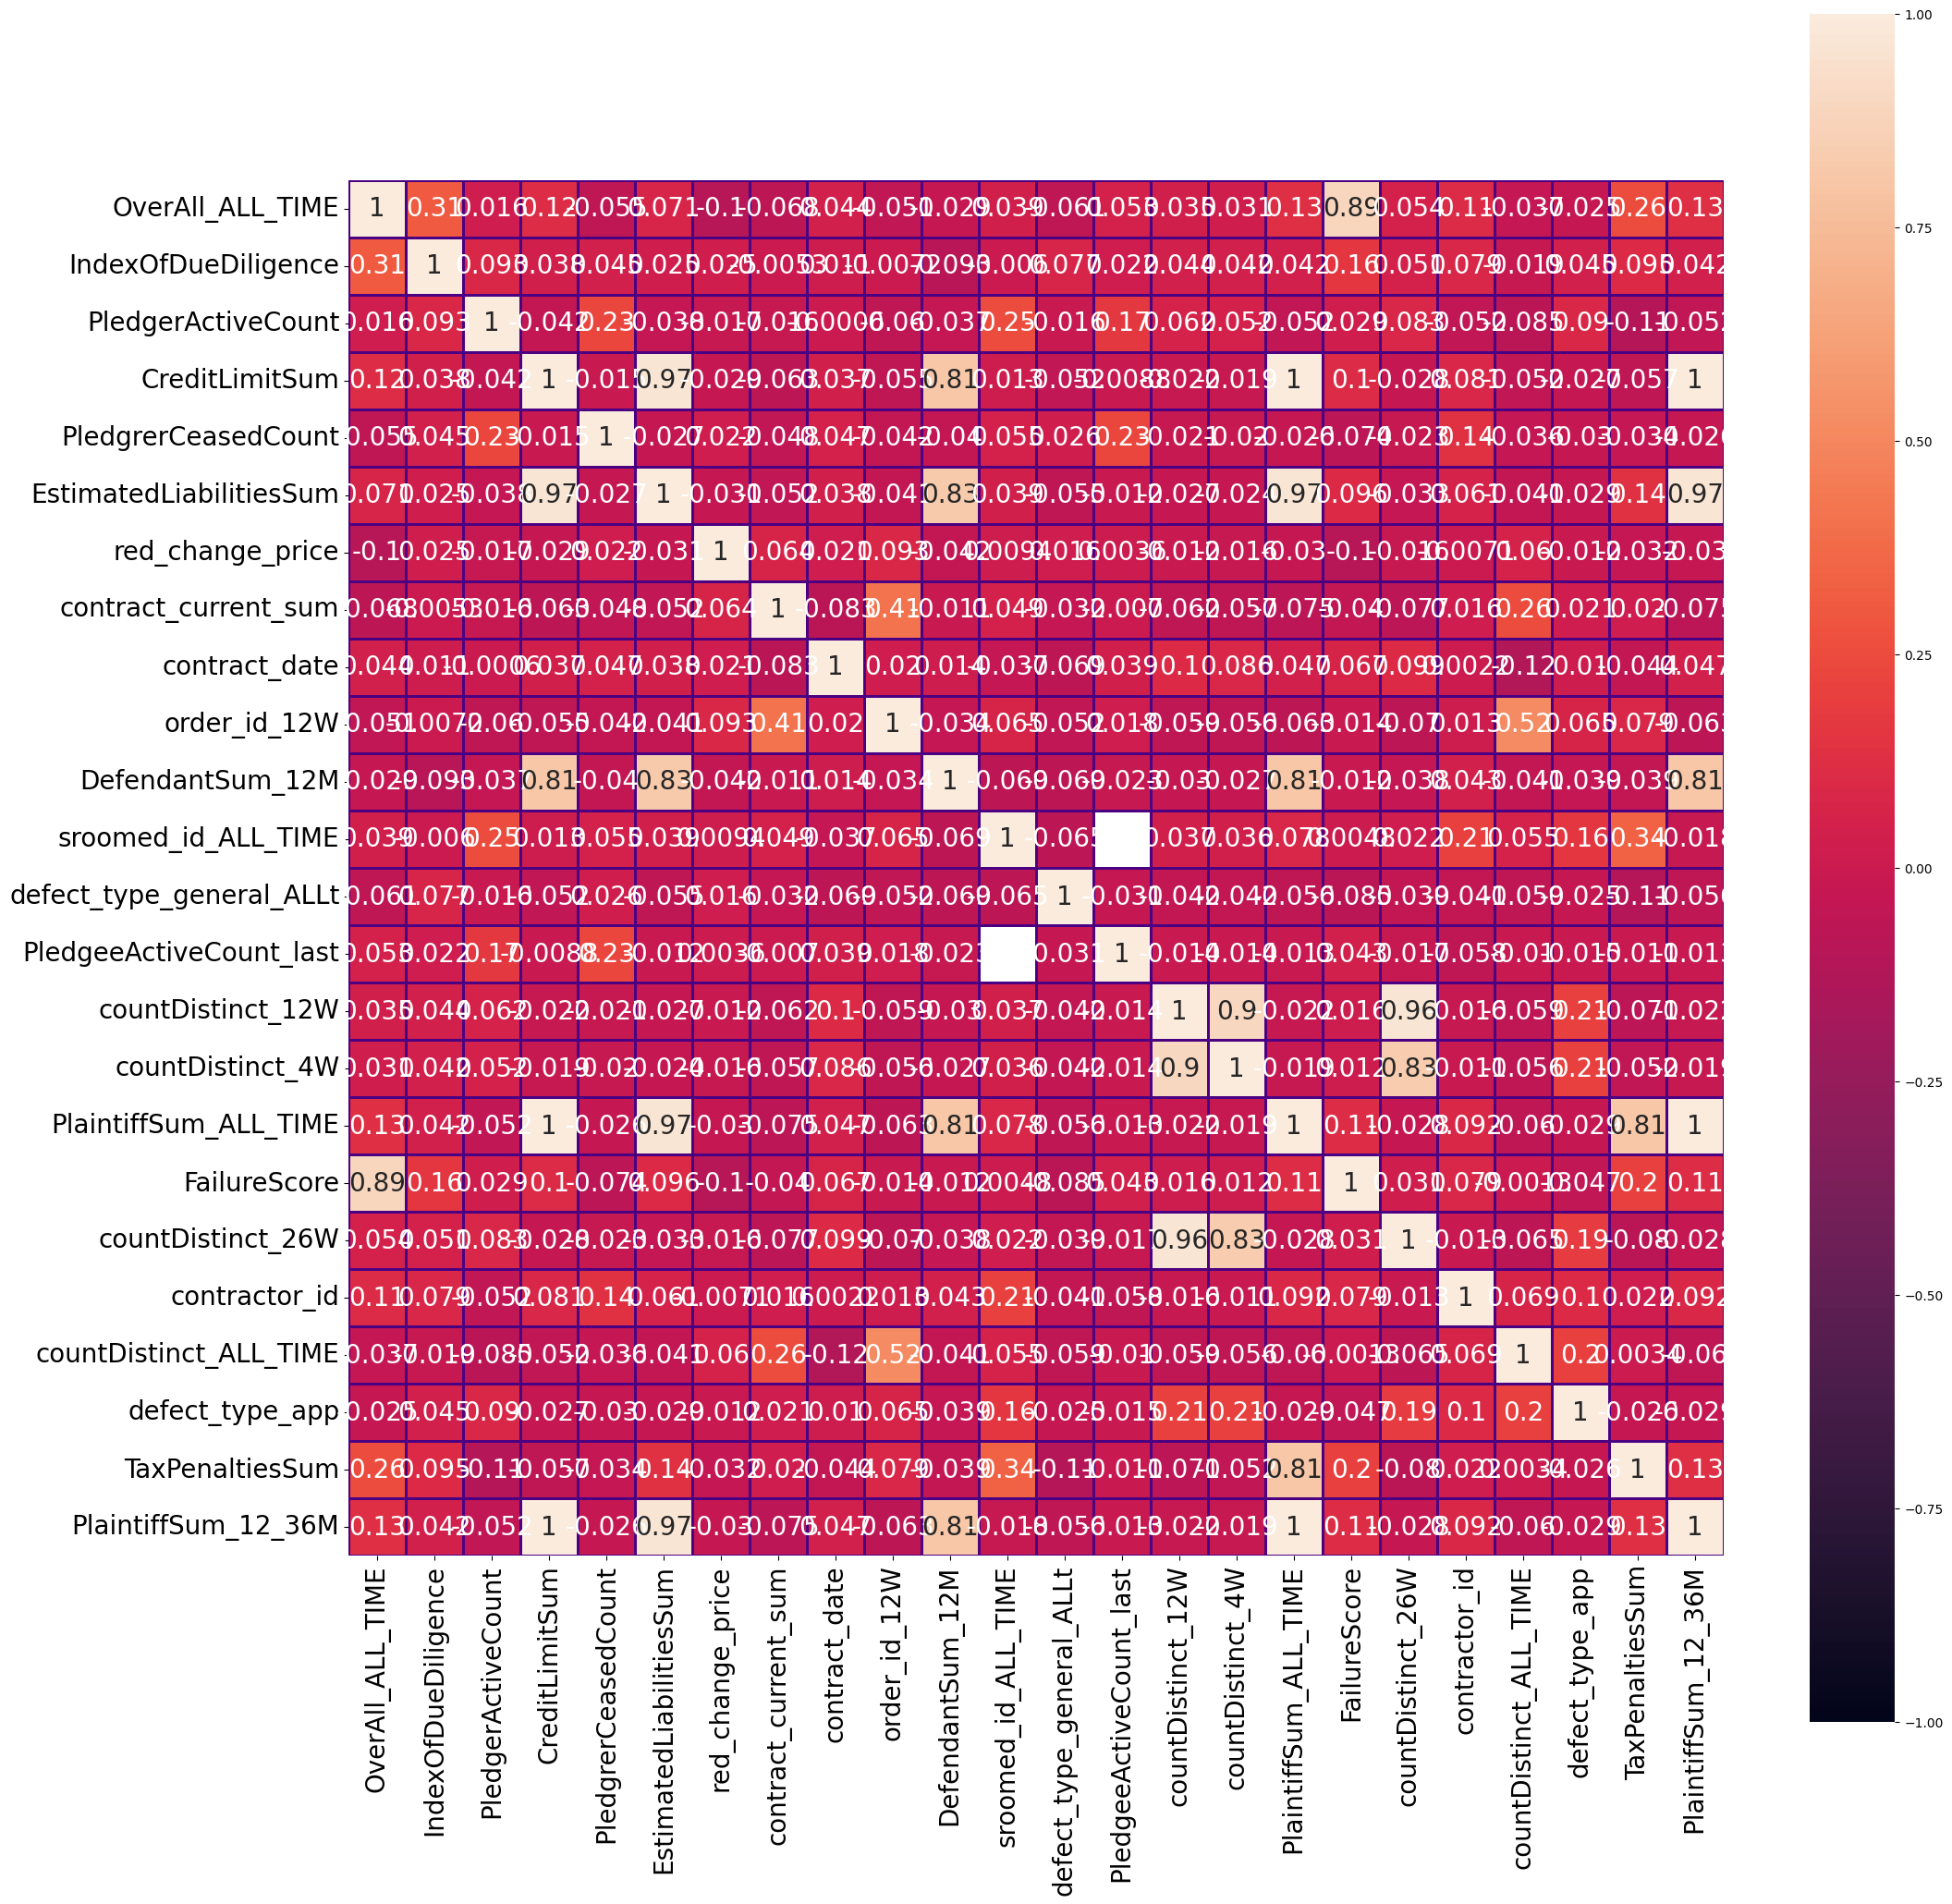

In [377]:
plt.figure(figsize=(24, 24))
plt.tight_layout()
sns.heatmap(data=best.corr(), vmin=-1, vmax=1, annot=True, lw=1,
            linecolor='indigo', square=True, annot_kws={'size': 20})
plt.yticks(size=20, rotation=0)
plt.xticks(size=20, rotation=90)
plt.show()

In [378]:
best.corr()

,OverAll_ALL_TIME,IndexOfDueDiligence,PledgerActiveCount,CreditLimitSum,PledgrerCeasedCount,EstimatedLiabilitiesSum,red_change_price,contract_current_sum,contract_date,order_id_12W,...,countDistinct_12W,countDistinct_4W,PlaintiffSum_ALL_TIME,FailureScore,countDistinct_26W,contractor_id,countDistinct_ALL_TIME,defect_type_app,TaxPenaltiesSum,PlaintiffSum_12_36M
OverAll_ALL_TIME,1.000000,0.308181,0.015898,0.115614,-0.055362,0.070649,-0.099604,-0.068035,0.044106,-0.051242,...,0.034795,0.030987,0.129431,0.886236,0.053863,0.106926,-0.037068,-0.025056,0.255107,0.129431
IndexOfDueDiligence,0.308181,1.000000,0.092626,0.038484,0.045033,0.025346,0.025328,-0.005268,0.011186,-0.007224,...,0.043717,0.042324,0.041526,0.157704,0.051082,0.079084,-0.019156,0.044578,0.094655,0.041526
PledgerActiveCount,0.015898,0.092626,1.000000,-0.041870,0.229794,-0.038319,-0.017165,-0.015675,-0.000601,-0.060238,...,0.062321,0.051621,-0.052114,0.029100,0.082810,-0.051992,-0.084846,0.089734,-0.112543,-0.052115
CreditLimitSum,0.115614,0.038484,-0.041870,1.000000,-0.015357,0.965815,-0.028886,-0.063198,0.036687,-0.055016,...,-0.022441,-0.019367,0.999594,0.101748,-0.027967,0.080601,-0.051892,-0.026740,-0.056987,0.999594
PledgrerCeasedCount,-0.055362,0.045033,0.229794,-0.015357,1.000000,-0.026527,0.022040,-0.048009,0.047231,-0.042303,...,-0.020834,-0.020077,-0.025601,-0.074212,-0.022815,0.135121,-0.035994,-0.029847,-0.034259,-0.025604
EstimatedLiabilitiesSum,0.070649,0.025346,-0.038319,0.965815,-0.026527,1.000000,-0.030564,-0.052326,0.037987,-0.041409,...,-0.027488,-0.024482,0.966219,0.096240,-0.033170,0.060801,-0.040642,-0.028806,0.136457,0.966218
red_change_price,-0.099604,0.025328,-0.017165,-0.028886,0.022040,-0.030564,1.000000,0.063606,0.021457,0.092900,...,-0.012007,-0.016396,-0.029975,-0.100484,-0.016454,-0.007052,0.060161,-0.011974,-0.031511,-0.029975
contract_current_sum,-0.068035,-0.005268,-0.015675,-0.063198,-0.048009,-0.052326,0.063606,1.000000,-0.083002,0.413959,...,-0.061687,-0.057254,-0.074594,-0.040274,-0.077000,0.016106,0.255904,0.020891,0.019621,-0.074594
contract_date,0.044106,0.011186,-0.000601,0.036687,0.047231,0.037987,0.021457,-0.083002,1.000000,0.019677,...,0.101449,0.085781,0.046872,0.066568,0.098607,0.002186,-0.121747,0.010026,-0.044372,0.046871
order_id_12W,-0.051242,-0.007224,-0.060238,-0.055016,-0.042303,-0.041409,0.092900,0.413959,0.019677,1.000000,...,-0.059361,-0.055896,-0.062880,-0.013876,-0.069684,0.013088,0.522372,0.064952,0.079369,-0.062880


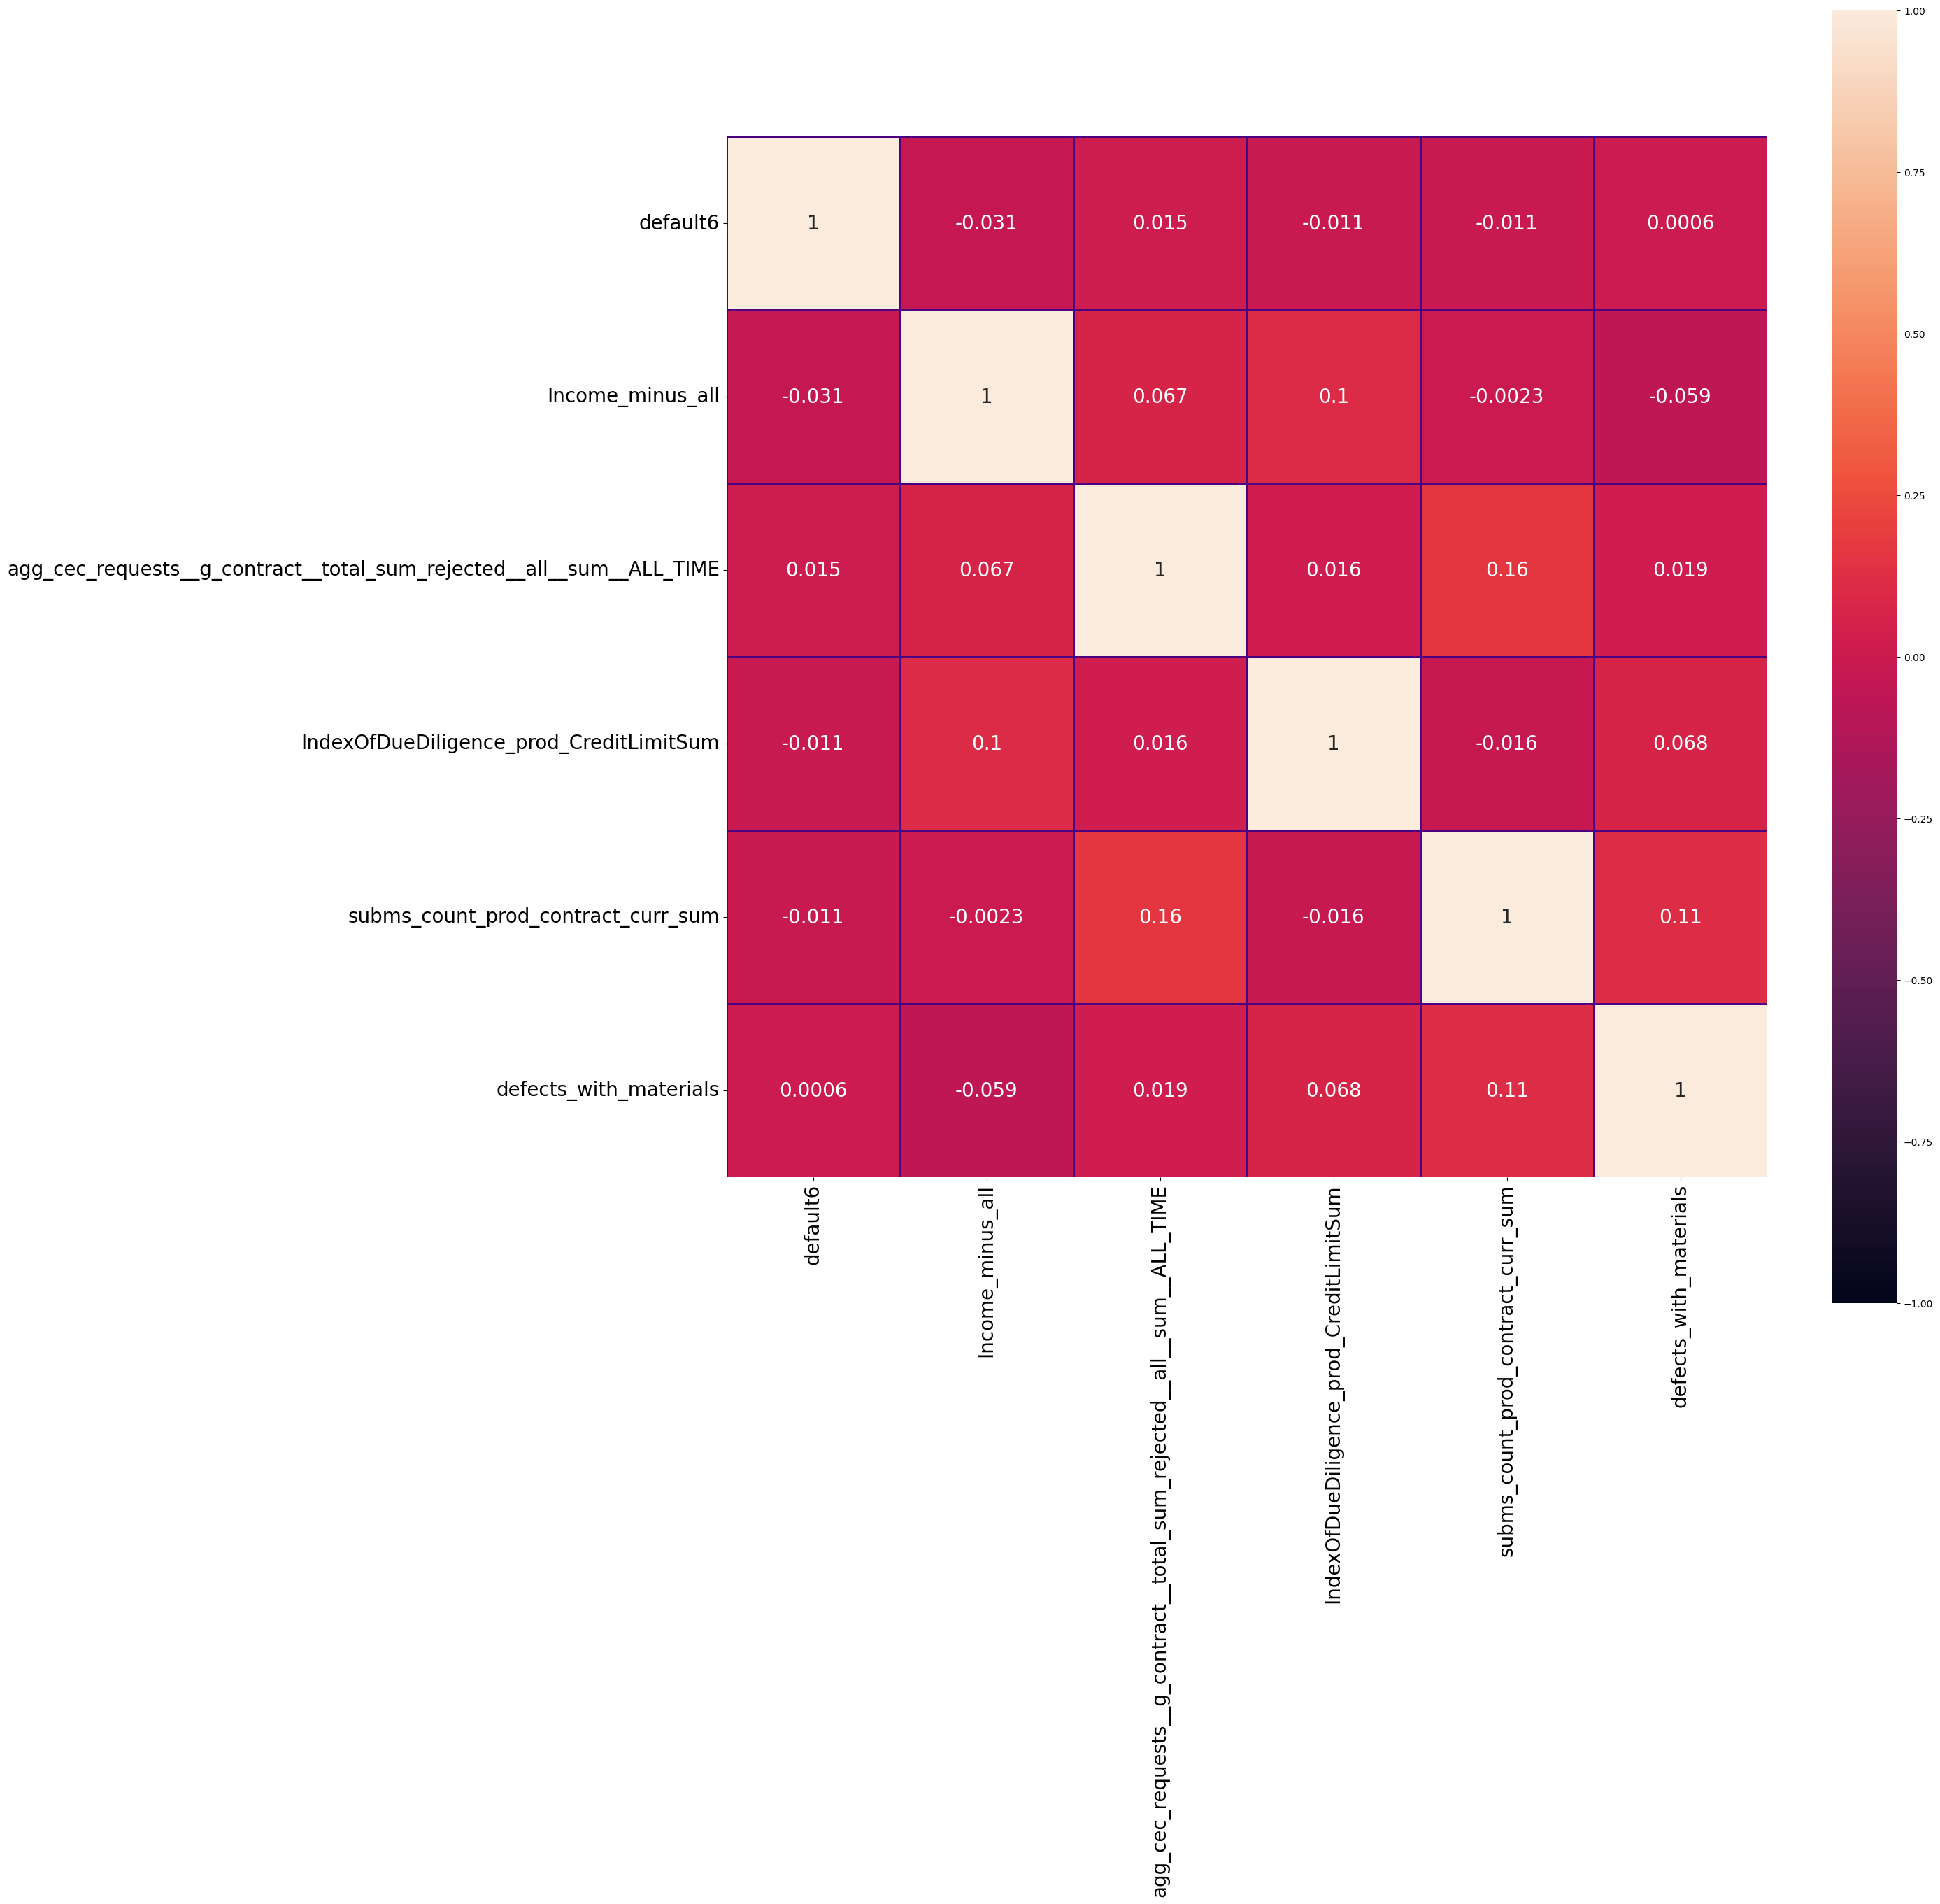

In [382]:
My_features = df[['default6', 'Income_minus_all', 'agg_cec_requests__g_contract__total_sum_rejected__all__sum__ALL_TIME', 'IndexOfDueDiligence_prod_CreditLimitSum', 'subms_count_prod_contract_curr_sum', 'defects_with_materials']].corr()
plt.figure(figsize=(24, 24))
plt.tight_layout()
sns.heatmap(data=My_features, vmin=-1, vmax=1, annot=True, lw=1,
            linecolor='indigo', square=True, annot_kws={'size': 20})
plt.yticks(size=20, rotation=0)
plt.xticks(size=20, rotation=90)
plt.show()